# Building a machine learning model that will identify customers that are eligible for loan or not.


In [259]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
# Loading my data and printing out a few lines. Perform operations to inspect data
Loan_data = pd.read_csv('loan_data_set.csv')
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

Now we will check the size of the Data.

In [261]:
Loan_data.shape 

(614, 13)

Checking the data types

In [262]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Now lets check how many null values are present in the data.

In [263]:
Loan_data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

As,we can see we have a Loan_ID as a variable it does not provide any insight about the Data ,so we will remove it.

In [264]:
Loan_data.drop("Loan_ID",axis=1,inplace=True)

In [265]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Checking for duplicated rows


In [266]:
Loan_data.duplicated().sum()

0

Now ,we would like to find the statistics like Count,mean,mode,stf,quantiles..etc. of all our Features/Variables.

In [267]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Viewing the column names of our Data Frame.

In [268]:
Loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [269]:
#Rename selected column names
Loan_data = Loan_data.rename(columns={"ApplicantIncome" : "Applicant_Income", "CoapplicantIncome" : "Coapplicant_Income", "LoanAmount" : "Loan_Amount"})

# Plotting and finding Insights.

As,we know the credit history variable is an object type lets convert it into object.

In [270]:
Loan_data['Credit_History']=Loan_data["Credit_History"].astype("object")

In [271]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         592 non-null    float64
 8   Loan_Amount_Term    600 non-null    float64
 9   Credit_History      564 non-null    object 
 10  Property_Area       614 non-null    object 
 11  Loan_Status         614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


#### Plotting a countplot of loan status

C:\Users\JOYCE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


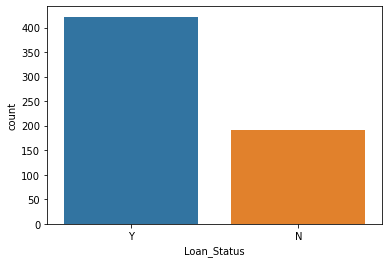

In [272]:
#Loan Status.
figsize=(7,3)
sns.countplot(Loan_data["Loan_Status"])                      
grid.add_legend()

The plot above shows that there are more cases of accepting a loan and less case of rejecting a loan.

Approximately loan accept is more then 50% of the loan rejected in the Bank.

#### Plotting a countplot of credit history

C:\Users\JOYCE\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


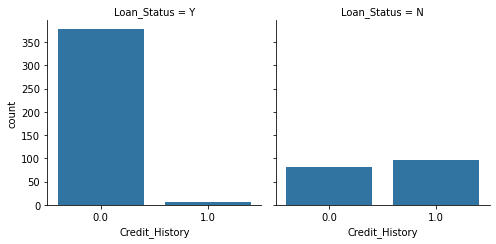

In [273]:
#Credit_History
grid=sns.FacetGrid(Loan_data,col="Loan_Status",height=3.5)
grid.map(sns.countplot,"Credit_History")

This is the countplot(frequency of Data) of Credit History with Loan Status divided in the Facetgrid.

The people who have a credit score 1 have a better chance to get a loan.

#### Plotting a countplot of gender with their loan status

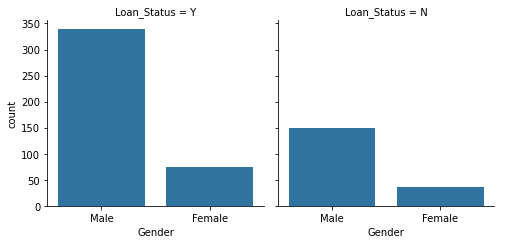

In [274]:
#Gender
grid=sns.FacetGrid(Loan_data, col="Loan_Status", height=3.5)
grid.map(sns.countplot,"Gender", order=['Male', 'Female'])
grid.add_legend()
grid.savefig("facet_plot.png")

In [275]:
# Mapping the target variable "Loan_Status" so that Y is 1 and N is 0, so as to check that it correlates with other numerical columns
Loan_data["Loan_Status"] = Loan_data["Loan_Status"].map({"Y" : 1, "N": 0})

In [276]:
numerical_cols = Loan_data.select_dtypes("number").columns
numerical_cols

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount',
       'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')

In [277]:
# The Loan_Status column seems to be the stand out column here, it has a positive correlation with the target variable and its closer to 1
# so we might consider credit_column has a feature that will determine loan eligibility
Loan_data.corr()["Loan_Status"].sort_values(ascending= False)

Loan_Status           1.000000
Applicant_Income     -0.004710
Loan_Amount_Term     -0.021268
Loan_Amount          -0.037318
Coapplicant_Income   -0.059187
Name: Loan_Status, dtype: float64

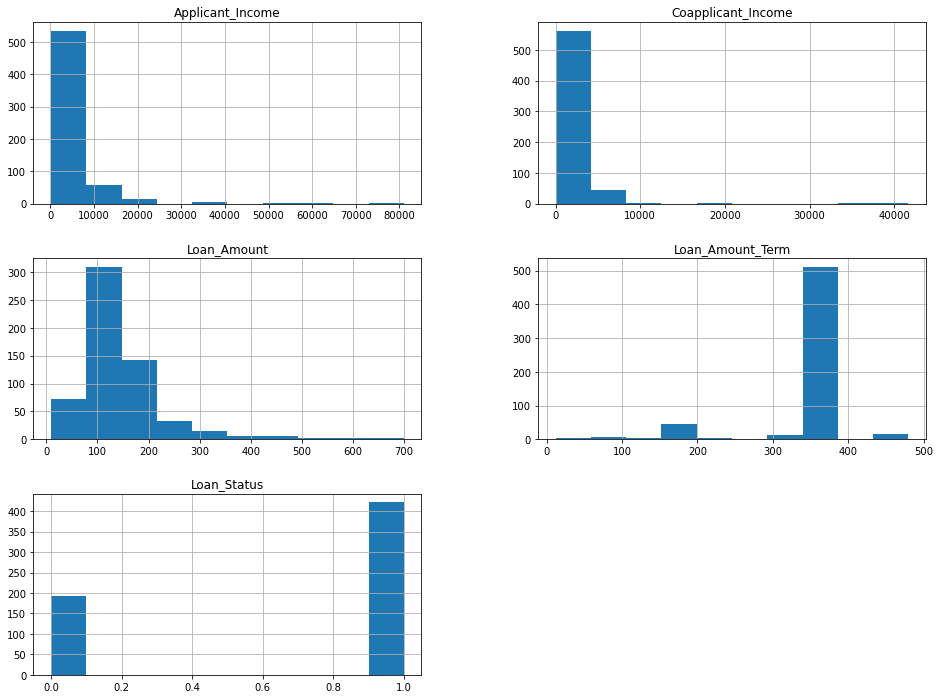

In [278]:
Loan_data[numerical_cols].hist(figsize=(16, 12));

### From the histogram above we can see that the columns "Coapplicant_Income" and "Applicant_Income" are rightly skewed just like the dataframe.describe has indicated that there might be extreme values in those columns, we can still explore this further

In [279]:
# The "Coapplicant_Income" and "Applicant_Income" columns have the highest skewed values
Loan_data[numerical_cols].skew().sort_values(ascending= False)

Coapplicant_Income    7.491531
Applicant_Income      6.539513
Loan_Amount           2.677552
Loan_Status          -0.809998
Loan_Amount_Term     -2.362414
dtype: float64

In [280]:
skewed_cols = ["Coapplicant_Income", "Applicant_Income"]

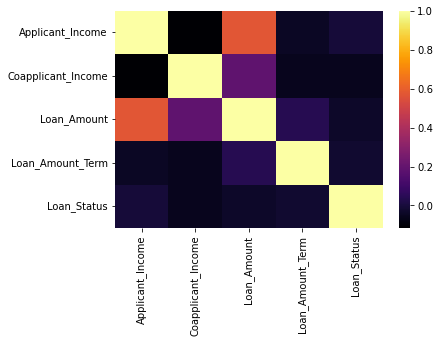

In [281]:
sns.heatmap(data=Loan_data.corr(), cmap="inferno");

### The heatmap above shows that the loan amount has a positive correlation with applicant income.

In [282]:
# Checking for outliers in the dataset
def outliers_func():
        outliers_cols = []
    
        for col in Loan_data.select_dtypes("number"): 
            q1 = Loan_data[col].quantile(.25)
            q3 = Loan_data[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (Loan_data[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (Loan_data[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [283]:
# calling the outliers function
outlier_columns = outliers_func()

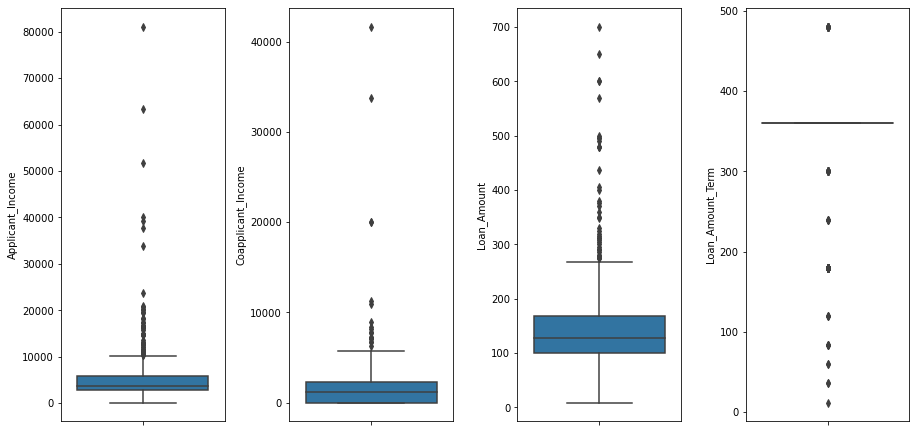

In [284]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(y=Loan_data[col])
plt.tight_layout()
plt.show()

In [285]:
categorical_col = Loan_data.select_dtypes("object")
categorical_col = pd.get_dummies(categorical_col)

C:\Users\JOYCE\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [286]:
categorical_col.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1


### Let's work on the categorical data and numerical data seperately now .

In [287]:
categorical_data=[]
Numerical_data=[]

for i,c in enumerate(Loan_data.dtypes):
  if c==object:
    categorical_data.append(Loan_data.iloc[:,i])
  else:
      Numerical_data.append(Loan_data.iloc[:,i])

In [288]:
categorical_data=pd.DataFrame(categorical_data).transpose()
Numerical_data=pd.DataFrame(Numerical_data).transpose()

#### Now lets see how our Categorical Data looks like.

In [289]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


#### Now lets see how our Numerical Data looks like.

In [290]:
Numerical_data.head()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Loan_Status
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,0.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


#### Now,here we want to fill our Null values in the Categorical Data by the most number of repeated values in that Feature Column.

In [332]:
categorical_data=categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
categorical_data.isnull().sum().any()

False

#### Now, in Case of our Numerical Data we will fill the Null values with the Help of Mean of that Feature/variable Column because an average explains the Data more precisely

In [292]:
Numerical_data=Numerical_data.apply(lambda x:x.fillna(x.mean()))
Numerical_data.isnull().sum().any()

False

#### Now we will import our LabelEncoder so that we can encode our Categorical Data into the o and 1 so that further it will be easy to know the correlation among them with the help of correlation matrix.

#### Here,using the fit_transform we are applying the Label_encoding in one go with fitting and transforming.

In [293]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in categorical_data:
 categorical_data[i]=LE.fit_transform(categorical_data[i])


In [294]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


#### Now let us plot the correlation matrix.

<AxesSubplot:title={'center':'Correlation Matrix'}>

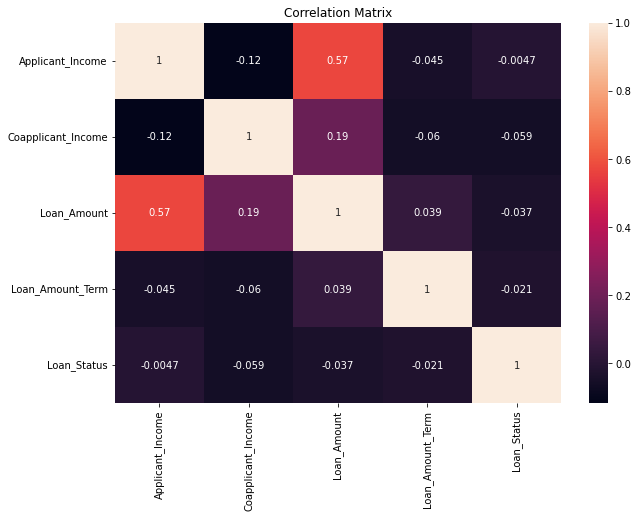

In [295]:
plt.figure(figsize=(10,7))
plt.title("Correlation Matrix")
sns.heatmap(Loan_data.corr(),annot=True,)

### We have seen no feature pose a high correlation with any other feature so there is no need to club or remove any feature.

### Though loan amount and application income have a good correlation.

## Data prepocessing Stage

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [297]:
# Transforming the skewed columns
Loan_data[skewed_cols] = Loan_data[skewed_cols].apply(lambda x: np.log(x + 1))

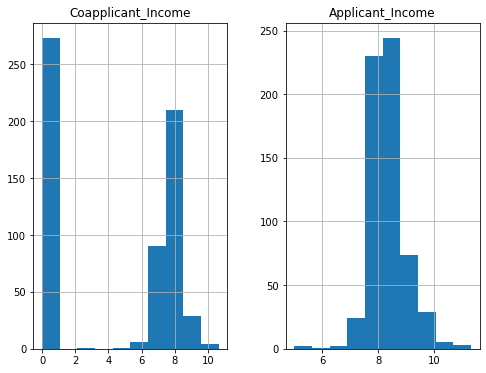

In [298]:
Loan_data[skewed_cols].hist(figsize=(8, 6));

#### The figure above shows that the columns have been transformed nicely

In [299]:
# Scaling the columns with outliers
Loan_data[outlier_columns] = scaler.fit_transform(Loan_data[outlier_columns])
Loan_data[outlier_columns]

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term
0,0.516186,-1.107783,NaN,0.276642
1,0.137806,0.782158,-0.215309,0.276642
2,-0.519479,-1.107783,-0.940328,0.276642
3,-0.751605,0.897526,-0.308860,0.276642
4,0.555727,-1.107783,-0.063289,0.276642
...,...,...,...,...
609,-0.572062,-1.107783,-0.881859,0.276642
610,-0.032679,-1.107783,-1.244368,-2.489775
611,1.015921,0.308483,1.246423,0.276642
612,0.918972,-1.107783,0.474628,0.276642


# Modelling

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [301]:
# split dataset into training and testing data
from sklearn.model_selection import train_test_split
X=pd.concat([categorical_data,Numerical_data],axis=1)


In [302]:
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [305]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target, test_size= 0.2, random_state= 42)

In [306]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [307]:
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores
        

In [309]:
# The logistic Regression and the SVC(support Vector Classifier) perform better among the models
#fit_predict_and_score(models, X_train, X_test, y_train, y_test)

In [ ]:
grid_model.best_estimator_.score(X_test , y_test)